In [2]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas as pd
import pandas, xgboost, numpy, textblob, string
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

In [5]:
# df_test = pd.read_csv('C:\\CSE-519-Project\\Input\\combined.csv', nrows=1000)
# print(len(df_test))

1000


In [3]:
df_test.to_csv('C:\\CSE-519-Project\\Input\\test.csv')

NameError: name 'df_test' is not defined

In [4]:
df_temp = pd.read_csv('../Data/all_combined.csv')
print(len(df_temp))

237046


In [8]:
df_temp.head()

,Unnamed: 0,state,id,link,county,newspaper,date,content,notice_id,category,...,Fictitious Business Names (DBA),Water Resumes,Tax Deeds,Seizures,Forfeited Property,Estate Claims,count_catogory,category_no_duplicate,category_no_duplicate_str,count_catogory_no_duplicate
0,0,Mississippi,626/2272017_23983816,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"notice of auction on friday, march 17, 2017 a...",23983816.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1
1,1,Mississippi,626/2272017_23983815,http://www.publicnoticeads.com/MS/search/view....,Pearl River,Picayune Item,2017/02/24,"public notice on october 28, 2015, the pa sta...",23983815.0,['License Suspension'],...,False,False,False,False,False,False,1,['License Suspension'],['License Suspension'],1
2,6,Louisiana,346/2242017_23980782,http://www.publicnoticeads.com/LA/search/view....,Lincoln,The Ruston Daily Leader,2017/02/24,february 24 legals notice of special elec...,23980782.0,['Elections'],...,False,False,False,False,False,False,1,['Elections'],['Elections'],1
3,17,Louisiana,363/3012017_23987556,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,sheriff's sales bank of america na vs. katedra...,23987556.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1
4,20,Louisiana,363/3012017_23987557,http://www.publicnoticeads.com/LA/search/view....,St. Bernard,The St. Bernard Voice,2017/02/24,sheriff's sales gulf coast bank and trust co v...,23987557.0,['Auctions'],...,False,False,False,False,False,False,1,['Auctions'],['Auctions'],1


In [ ]:
df_temp = df_temp[['content', 'category_no_duplicate']]
df_temp = df_temp.rename(columns={'category_no_duplicate': 'category'})
df_temp.category = df_temp.category.str.lower() 

In [8]:
df_temp.category = df_temp.category.str.replace('[','') 
df_temp.category = df_temp.category.str.replace(']','')
df_temp.category = df_temp.category.str.replace('\'','') 

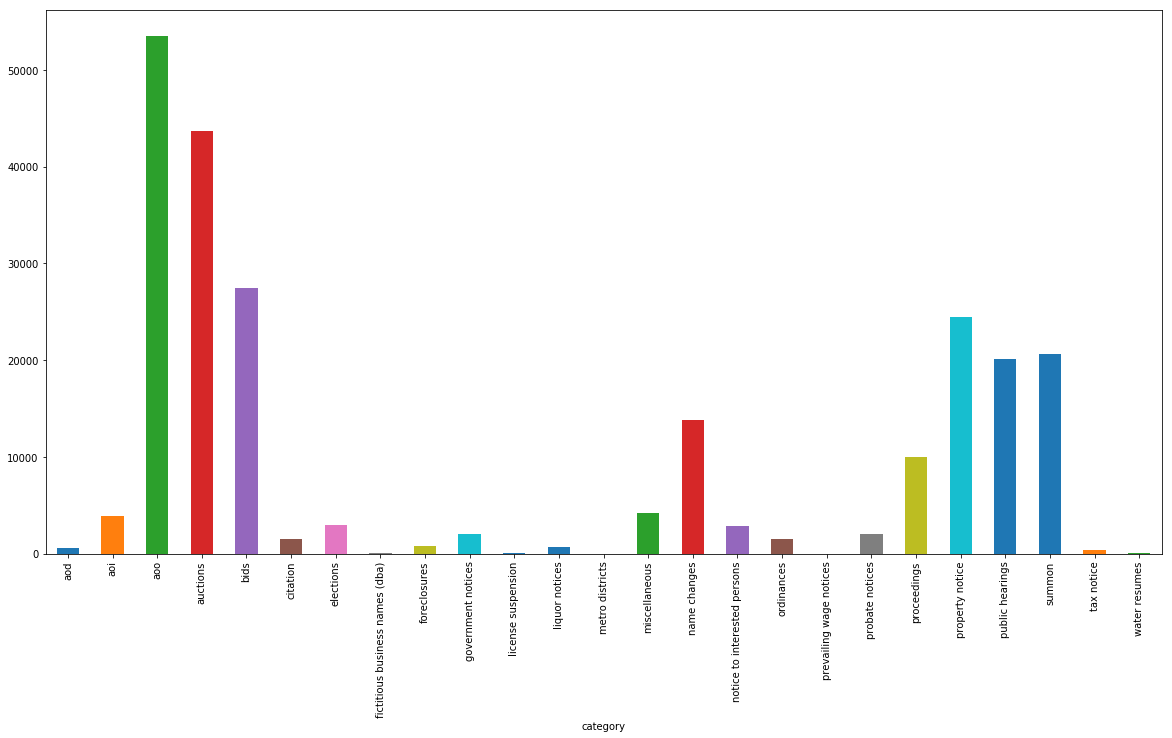

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_temp.groupby('category')['content'].count().plot.bar(ylim=0, figsize=(20,10))
plt.show()

In [11]:
df_temp.category = df_temp.category.str.replace('[','')
df_temp.category = df_temp.category.str.replace(']','')
df_temp.category = df_temp.category.str.replace('\'','')

In [12]:
df_temp.category.unique()

array(['Auctions', 'License Suspension', 'Elections', 'Proceedings',
       'Bids', 'AOO', 'AOI', 'AOD', 'Citation', 'Property Notice',
       'Public Hearings', 'Ordinances', 'Summon', 'Liquor Notices',
       'Miscellaneous', 'Name Changes', 'Notice to Interested Persons',
       'Probate Notices', 'Tax Notice', 'Government Notices',
       'Foreclosures', 'Metro Districts',
       'Fictitious Business Names (DBA)', 'Water Resumes',
       'Prevailing Wage Notices'], dtype=object)

In [13]:
CATEGORY_LIST  = ['Auctions', 'License Suspension', 'Elections', 'Proceedings',
           'Bids', 'AOO', 'AOI', 'AOD', 'Citation', 'Property Notice',
           'Public Hearings', 'Ordinances', 'Summon', 'Liquor Notices',
           'Miscellaneous', 'Name Changes', 'Notice to Interested Persons',
           'Probate Notices', 'Tax Notice', 'Government Notices',
           'Foreclosures', 'Metro Districts',
           'Fictitious Business Names (DBA)', 'Water Resumes',
           'Prevailing Wage Notices']

In [14]:
def replace_other(row):
    if row !=TARGET:
        return 'Other'
    else:
        return TARGET

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns

def train_model(classifier, feature_vector_train, label, feature_vector_valid, true_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    conf_mat = confusion_matrix(true_y, predictions)

#     plt.figure(figsize=(9,9))
#     sns.heatmap(conf_mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r',)
#     plt.ylabel('Actual label')
#     plt.xlabel('Predicted label')
    
    scores = precision_recall_fscore_support(true_y, predictions, average='macro')
    return scores, classifier

#     all_sample_title = 'Accuracy Score: {0}'.format(score)
#     plt.title(all_sample_title, size = 15)

    #return metrics.accuracy_score(predictions, true_y)

In [29]:
category_pred = []

#for TARGET in CATEGORY_LIST:
TARGET = 'Auctions'
print(TARGET)
temp = []
temp.append(TARGET)
#TARGET = 'Public Hearings'
df = df_temp[df_temp['category']==TARGET]
n = len(df)
print(n)
temp.append(str(n))

df = df.append(df_temp[df_temp['category']!=TARGET].sample(n=n))
df['category_new'] = df.category.apply(replace_other)
#print(df.groupby('category_new')['content'].count())

X = df['content']
Y = df['category_new']

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)
x_count = count_vect.transform(X)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X)
x_tfidf =  tfidf_vect.transform(X)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(Y)

split_size = int((x_tfidf.shape[0])*.3)
kf = KFold(n_splits=5, shuffle=True)
avg_acr = []

for train_index, test_index in kf.split(x_tfidf):
    train_x, valid_x = x_tfidf[train_index], x_tfidf[test_index] 
    train_y, valid_y = y[train_index], y[test_index]

    # Extereme Gradient Boosting on Count Vectors
    accuracy, model = train_model(xgboost.XGBClassifier(), train_x.tocsc(), train_y, valid_x.tocsc(), valid_y)
    avg_acr.append(accuracy[:3])

#print(np.array(avg_acr).mean(axis=0))

temp.extend(np.array(avg_acr).mean(axis=0))
category_pred.append(temp)

Auctions
43661


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

License Suspension
27


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Elections
2952


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Proceedings
10019


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Bids
27460


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

AOO
53510


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

AOI
3911


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

AOD
547


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Citation
1554


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Property Notice
24487


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Public Hearings
20123


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Ordinances
1464


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Summon
20591


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Liquor Notices
668


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Miscellaneous
4182


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Name Changes
13768


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Notice to Interested Persons
2875


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Probate Notices
2021


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Tax Notice
408


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Government Notices
1970


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Foreclosures
784


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Metro Districts
4


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use

Fictitious Business Names (DBA)
19


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Water Resumes
36


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

Prevailing Wage Notices
5


C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in la

In [31]:
df_acrcy = pd.DataFrame(category_pred, columns=['category','notice','pre','rec','acc'])

In [33]:
df_acrcy.head(20)

,category,notice,pre,rec,acc
0,Auctions,43661,0.995694,0.995683,0.995683
1,License Suspension,27,0.983333,0.983333,0.981818
2,Elections,2952,0.995662,0.995522,0.995586
3,Proceedings,10019,0.992912,0.992868,0.992863
4,Bids,27460,0.998160,0.998161,0.998161
5,AOO,53510,0.999113,0.999113,0.999112
6,AOI,3911,0.997691,0.997716,0.997698
7,AOD,547,1.000000,1.000000,1.000000
8,Citation,1554,0.997801,0.997705,0.997742
9,Property Notice,24487,0.999448,0.999449,0.999449
